In [123]:
# Step 3: Importing Libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [124]:
# Step 2: Load dataset
df = pd.read_csv(r"C:\Users\anany\Downloads\2nd sem Shailendra sir class pdf\Data sets\Cabs_Cancel.csv" )

In [125]:
# Step 3: EDA
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5000 non-null   int64  
 1   user_id              5000 non-null   int64  
 2   vehicle_model_id     5000 non-null   int64  
 3   travel_type_id       5000 non-null   int64  
 4   from_area_id         4995 non-null   float64
 5   to_area_id           4142 non-null   float64
 6   date_travel          5000 non-null   object 
 7   online_booking       5000 non-null   int64  
 8   mobile_site_booking  5000 non-null   int64  
 9   booking_created      5000 non-null   object 
 10  from_lat             4994 non-null   float64
 11  from_long            4994 non-null   float64
 12  to_lat               4142 non-null   float64
 13  to_long              4142 non-null   float64
 14  Car_Cancellation     5000 non-null   int64  
dtypes: float64(6), int64(7), object(2)
mem

In [126]:
print(df.head())

       id  user_id  vehicle_model_id  travel_type_id  from_area_id  \
0  149748    26873                12               2        1095.0   
1  183456    33100                12               2        1226.0   
2  176071    41879                12               2         571.0   
3  182410    41512                12               2        1070.0   
4  183998    47731                12               2         142.0   

   to_area_id       date_travel  online_booking  mobile_site_booking  \
0      1061.0    5/18/2013 7:30               1                    0   
1      1259.0    11/07/13 15:45               1                    0   
2       625.0   9/28/2013 17:30               1                    0   
3       934.0  11/25/2013 17:00               0                    0   
4       393.0     11/11/13 5:00               1                    0   

    booking_created   from_lat  from_long     to_lat    to_long  \
0   5/17/2013 21:31  12.924150  77.672290  12.924878  77.566255   
1     11/07/

In [127]:
print(df.describe())

                 id       user_id  vehicle_model_id  travel_type_id  \
count    5000.00000   5000.000000       5000.000000     5000.000000   
mean   162031.49560  32034.526200         24.021000        2.122000   
std     15671.23646  11139.383766         25.875202        0.395913   
min    132522.00000     16.000000         10.000000        1.000000   
25%    148816.75000  25925.250000         12.000000        2.000000   
50%    162937.00000  32599.000000         12.000000        2.000000   
75%    176840.00000  41218.500000         12.000000        2.000000   
max    185932.00000  48724.000000         91.000000        3.000000   

       from_area_id   to_area_id  online_booking  mobile_site_booking  \
count   4995.000000  4142.000000     5000.000000          5000.000000   
mean     713.349550   701.234669        0.448800             0.063600   
std      427.830665   415.885485        0.497421             0.244063   
min        2.000000     6.000000        0.000000             0.00000

# Concept:
We check data types and missing values early, because they decide how we clean/prepare the data.

In [128]:
pd.DataFrame(df.isna().sum())

,0
id,0
user_id,0
vehicle_model_id,0
travel_type_id,0
from_area_id,5
to_area_id,858
date_travel,0
online_booking,0
mobile_site_booking,0
booking_created,0


# Concept:
Machine learning models can’t directly work with NaN (missing values), so we fix or remove them.

In [129]:
# replace na by mean

In [130]:
df["to_area_id"] = df["to_area_id"].fillna(df["to_area_id"].mean())
df["to_lat"] = df["to_lat"].fillna(df["to_lat"].mean())
df["to_long"] = df["to_long"].fillna(df["to_long"].mean())

In [131]:
df.isna().sum()

id                     0
user_id                0
vehicle_model_id       0
travel_type_id         0
from_area_id           5
to_area_id             0
date_travel            0
online_booking         0
mobile_site_booking    0
booking_created        0
from_lat               6
from_long              6
to_lat                 0
to_long                0
Car_Cancellation       0
dtype: int64

In [132]:
df.dropna(inplace = True)

In [133]:
df.isna().sum()

id                     0
user_id                0
vehicle_model_id       0
travel_type_id         0
from_area_id           0
to_area_id             0
date_travel            0
online_booking         0
mobile_site_booking    0
booking_created        0
from_lat               0
from_long              0
to_lat                 0
to_long                0
Car_Cancellation       0
dtype: int64

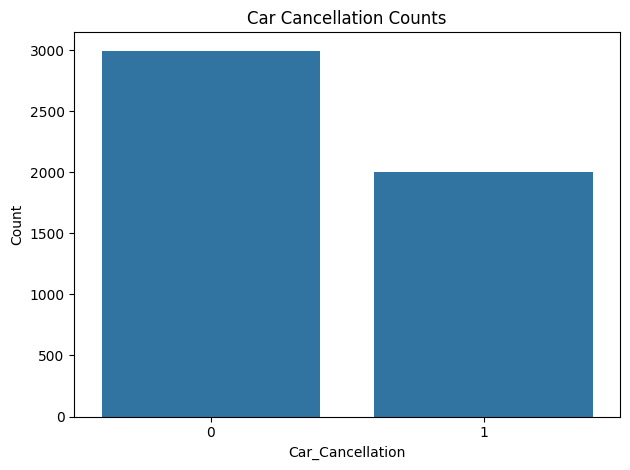

In [134]:
sns.countplot(x='Car_Cancellation', data=df)
plt.title('Car Cancellation Counts')
plt.xlabel('Car_Cancellation')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [135]:
df.drop("date_travel", axis=1, inplace=True)

In [136]:
df.head()

,id,user_id,vehicle_model_id,travel_type_id,from_area_id,to_area_id,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,149748,26873,12,2,1095.0,1061.0,1,0,5/17/2013 21:31,12.924150,77.672290,12.924878,77.566255,1
1,183456,33100,12,2,1226.0,1259.0,1,0,11/07/13 7:44,13.015080,77.677960,12.911942,77.651582,1
2,176071,41879,12,2,571.0,625.0,1,0,9/28/2013 15:50,12.951850,77.696420,12.954310,77.655300,1
3,182410,41512,12,2,1070.0,934.0,0,0,10/31/2013 12:13,12.926098,77.681121,12.923230,77.592030,1
4,183998,47731,12,2,142.0,393.0,1,0,11/10/13 21:50,12.912810,77.609230,13.199560,77.706880,1


In [137]:
# Drop IDs (not useful for prediction)
df = df.drop(['id', 'user_id'], axis=1)

In [155]:
## Checking if targeted variable is balanced or imbalanced

# Count occurrences of each class
class_counts = df['Car_Cancellation'].value_counts()

# Print counts
print(class_counts)

# Print percentage distribution
print("\nPercentage distribution:")
print((class_counts / len(df)) * 100)

Car_Cancellation
0    2995
1    1999
Name: count, dtype: int64

Percentage distribution:
Car_Cancellation
0    59.971966
1    40.028034
Name: count, dtype: float64


In [139]:
# Check which columns still exist in the dataframe
print(df.columns)

Index(['vehicle_model_id', 'travel_type_id', 'from_area_id', 'to_area_id',
       'online_booking', 'mobile_site_booking', 'booking_created', 'from_lat',
       'from_long', 'to_lat', 'to_long', 'Car_Cancellation'],
      dtype='object')


In [140]:
# Keep only those categorical columns that are still present
categorical_cols = [col for col in ['vehicle_model_id', 'travel_type_id', 'from_area_id', 'to_area_id'] if col in df.columns]

In [141]:
# One-hot encoding safely
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True) 

# Concept:
Neural networks work with numbers — not words or categories.

In [142]:
print(df_encoded.head())
print("Shape after encoding:", df_encoded.shape)

   online_booking  mobile_site_booking   booking_created   from_lat  \
0               1                    0   5/17/2013 21:31  12.924150   
1               1                    0     11/07/13 7:44  13.015080   
2               1                    0   9/28/2013 15:50  12.951850   
3               0                    0  10/31/2013 12:13  12.926098   
4               1                    0    11/10/13 21:50  12.912810   

   from_long     to_lat    to_long  Car_Cancellation  vehicle_model_id_12  \
0  77.672290  12.924878  77.566255                 1                 True   
1  77.677960  12.911942  77.651582                 1                 True   
2  77.696420  12.954310  77.655300                 1                 True   
3  77.681121  12.923230  77.592030                 1                 True   
4  77.609230  13.199560  77.706880                 1                 True   

   vehicle_model_id_14  ...  to_area_id_1388.0  to_area_id_1389.0  \
0                False  ...              

In [119]:
df = df.drop(columns=['booking_created'],inplace = True)

In [143]:
# ---------------- Step 1: Drop datetime and target columns ----------------
cols_to_drop = ['booking_created']  # replace with your actual datetime/string columns
df = df.drop(columns=cols_to_drop, errors='ignore')

In [144]:
# ---------------- Step 2: Separate features & target ----------------
X = df.drop(columns=['Car_Cancellation'])
y = df['Car_Cancellation']

In [145]:
# ---------------- Step 3: Train-test split ----------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [146]:
# ---------------- Step 4: Scale numerical features ----------------
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [160]:
# ---------------- Step 5: ANN Model ----------------
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

import warnings
warnings.filterwarnings("ignore", category=UserWarning)


# Concept:
ANN Structure in simple words:

Input Layer → Gets all features.

Hidden Layers → Detect patterns.

Output Layer → Gives prediction (cancel or not).

In [161]:
# ---------------- Step 6: Train ----------------
history = model.fit(X_train_scaled, y_train, 
                    validation_data=(X_test_scaled, y_test),
                    epochs=20, 
                    batch_size=32, 
                    verbose=1)

Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6586 - loss: 0.6112 - val_accuracy: 0.7057 - val_loss: 0.5646
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7074 - loss: 0.5671 - val_accuracy: 0.7177 - val_loss: 0.5609
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7174 - loss: 0.5628 - val_accuracy: 0.7207 - val_loss: 0.5582
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7186 - loss: 0.5629 - val_accuracy: 0.7197 - val_loss: 0.5589
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7149 - loss: 0.5560 - val_accuracy: 0.7157 - val_loss: 0.5583
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7289 - loss: 0.5443 - val_accuracy: 0.7197 - val_loss: 0.5573
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7302 - loss: 0.5449 - val_accuracy: 0.7217 - val_loss: 0.5584
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7229 - loss: 0.5469 - val_accuracy: 0.

In [162]:
# ---------------- Step 7: Evaluate ----------------
loss, acc = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {acc:.4f}")

Test Accuracy: 0.7247


In [163]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [164]:
# ---------------- Step 1: Predictions ----------------
y_pred_prob = model.predict(X_test_scaled)  # probabilities
y_pred = (y_pred_prob > 0.5).astype(int)    # threshold at 0.5

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [165]:
# ---------------- Step 2: Confusion Matrix ----------------
cm = confusion_matrix(y_test, y_pred)

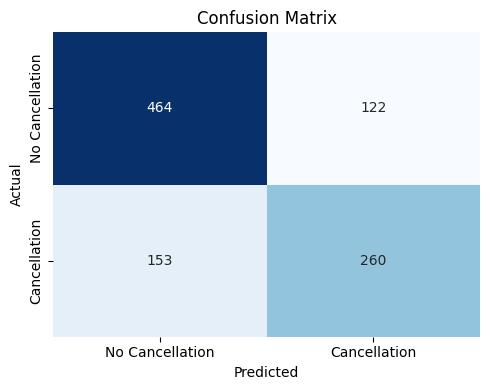

In [166]:
# ---------------- Step 3: Plot ----------------
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Cancellation', 'Cancellation'],
            yticklabels=['No Cancellation', 'Cancellation'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [167]:
# ---------------- Step 4: Metrics ----------------
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.79      0.77       586
           1       0.68      0.63      0.65       413

    accuracy                           0.72       999
   macro avg       0.72      0.71      0.71       999
weighted avg       0.72      0.72      0.72       999



In [156]:
## error metrics

In [157]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.651064,0.623965,0.697698,0.573333
1,0.707635,0.573414,0.709710,0.559607
2,0.720401,0.563292,0.713714,0.559043
3,0.719650,0.561646,0.705706,0.557325
4,0.718398,0.553174,0.716717,0.557687
5,0.726158,0.554010,0.713714,0.554994
6,0.724656,0.546748,0.716717,0.555986
7,0.733667,0.545370,0.724725,0.553408
8,0.728911,0.545323,0.721722,0.553029
9,0.729161,0.545685,0.724725,0.553529


# Conclusion (In Simple Words)
You now have a system that, after seeing previous booking data, can look at upcoming bookings and predict if a customer is likely to cancel.

The analysis teaches you how to prepare data properly, build a neural network, train it, and check if it works—so you can make business decisions or send reminders to likely-to-cancel customers.